In [105]:
from collections import defaultdict
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [41]:
class UG():
    
    def __init__(self,gr_tuples):
        self.graph = defaultdict(list) # adjacency lists
    
        for (w,v) in gr_tuples:
            self.addEdge(w,v)

    def addEdge(self, v, w):
        self.graph[v].append(w)
        self.graph[w].append(v)
    
    # vertices adjacent to v
    def adj(self,v):
        return self.graph[v]

    # number of vertices
    def V(self):
        return len(self.graph)
    
    # number of edges
    def E(self):
        return sum(len(self.graph[i]) for i in self.graph)

    def __iter__(self):
        return iter(self.graph)
    
    # string representation
    def __str__(self):        
        return '\n'.join(['%i -> %s'%( v, ', '.join(map(str, self.graph[v]))) 
                          for v in self.graph])
            

        

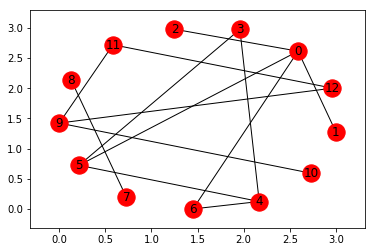

In [118]:
import math
G = nx.Graph()
G.add_edges_from(gtup)
pos = nx.spring_layout(G, scale=3, k=5/math.sqrt(G.order()))
nx.draw_networkx(G, pos)
plt.show()

In [42]:
gtup=[(0,5),(4,3),(0,1),(9,12),(6,4),(5,4),(0,2),(11,12),(9,10),(0,6),(7,8),(9,11),(5,3)]
und_graph = UG(gtup)

In [43]:
print(und_graph)

0 -> 5, 1, 2, 6
1 -> 0
2 -> 0
3 -> 4, 5
4 -> 3, 6, 5
5 -> 0, 4, 3
6 -> 4, 0
7 -> 8
8 -> 7
9 -> 12, 10, 11
10 -> 9
11 -> 12, 9
12 -> 9, 11


In [68]:
def degree(G, v):
    return len(G.adj(v))

def max_degree(G):
    return max([len(G.adj(v)) for v in G])

def avg_degree(G):
    return 2.0 * G.E()/G.V()

def number_of_self_loops(G):
    count = 0
    for v in G:
        for w in G.adj(v):
            if v == w:
                count += 1
    # each edge counted twice
    return count/2 

In [69]:
degree(und_graph,3)

2

In [70]:
max_degree(und_graph)

4

In [71]:
avg_degree(und_graph)

4.0

In [72]:
number_of_self_loops(und_graph)

0.0

![](imgs/ug1.png)

## Depth First Traversal

- Goal:  Systematically search through a graph
- Typical applications.
    -  Find all vertices connected to a given source vertex.
    -  Find a path between two vertices.

![](imgs/ug2.png)

- find all vertices connected to source vertix
- Put unvisited vertices on a stack. 
- DFS marks all vertices connected to s in time proportional to the sum of their degrees.
- After DFS, can find vertices connected to s in constant time and can find a path to s (if one exists) in time proportional to its length.


In [3]:
class DepthFirstPaths(object):

    def __init__(self,graph,s):
        self.marked = defaultdict(bool) # marked visited vertices
        self.edgeTo = {}  # keep tree of paths;
        self.dfs(graph,s)

    def dfs(self,graph,v):
        self.marked[v]=True
        for w in graph.adj(v):
            if not self.marked[w]:
                self.dfs(graph,w)
                self.edgeTo[w]=v # means that edge v-w taken to visit w for first time

## Breadth First Traversal

- BFS examines vertices in increasing distance from s.
- BFS computes shortest paths (fewest number of edges) from s to all other vertices in a graph in time proportional to E + V.

In [ ]:
from collections import deque
class BreadthFirstPaths(object):
    """
    -Find path from s to t that uses fewest number of edges
    -Put unvisited vertices on a queue.
    -BFS examines vertices in increasing distance from s.
    -BFS computes shortest paths (fewest number of edges)
     from s to all other vertices in a graph in time proportional to E + V
    """
    def __init__(self,graph,s):
        self.marked=defaultdict(bool)
        self.edgeTo={}
        self.bfs(graph,s)

    def bfs(self,graph,s):
        q=deque()
        q.append(s)
        self.marked[s]=True
        while(len(q)> 0):
            print (q)
            v=q.popleft()
            for w in graph.adj(v):
                if not self.marked[w]:
                    q.append(w)
                    self.marked[w]=True
                    self.edgeTo[w]=v

## Connected Components

- Def: Vertices v and w are connected if there is a path between them
- Goal: Preprocess graph to answer queries of the form is v connected to w? in constant time 
- The relation "is connected to" is an equivalence relation: 
    - Reflexive: v is connected to v.
    - Symmetric: if v is connected to w, then w is connected to v.
    - Transitive: if v connected to w and w connected to x, then v connected to x.

- Def: A connected component is a maximal set of connected vertices.    

In [4]:
class ConnectedComponents():
    """
    Vertices v and w are connected if there is a path between them

    """
    def __init__(self,graph):
        self.marked=dict((v,False) for v in graph)
        self.cc_id=defaultdict(int) # component identifier for v
        self.count=0 # number of connected components
        self.graph=graph
        self.connected() # are v and w connected

    def connected(self):
        for v in self.graph:
            if not self.marked[v]:
                self.dfs(self.graph,v)
                self.count+=1

    def dfs(self,graph,v):
        self.marked[v]=True
        self.cc_id[v]=self.count
        for w in graph.adj(v):
            if not self.marked[w]:
                self.dfs(graph,w)



In [ ]:


class M_Color():
    """
    http://www.geeksforgeeks.org/backttracking-set-5-m-coloring-problem/
    uses backtracking
    Given an undirected graph and a number m, determine if the graph
    can be colored with at most m colors such that no two adjacent
    vertices of the graph are colored with same color. Here coloring
    of a graph means assignment of colors to all vertices.

    """
    def __init__(self, G, m):
        self.G = G
        self.V = len(self.G)
        self.color = [0] * self.V
        self.m = m
        self.coloring(m, 0)

    def is_safe(self, v, c):
        # check if the current color assignment is safe for vertex v
        for i in range(self.V):
            if self.G[v][i] == 1 and c == self.color[i]:
                return False
        return True

    def coloring(self, m, v):
        # base case: If all vertices are assigned a color then return true
        if v == self.V:
            return True

        # Consider this vertex v and try different colors
        for c in range(1, self.m + 1):
            # Check if assignment of color c to v is fine
            if self.is_safe(v, c):
                self.color[v] = c

                # recur to assign colors to rest of the vertices
                if self.coloring(self.m, v + 1):
                    return True

                # If assigning color c doesn't lead to a solution then remove it
                self.color[v] = 0

        # If no color can be assigned to this vertex then return false
        return False



graph = [[0, 1, 1, 1],
         [1, 0, 1, 0],
         [1, 1, 0, 1],
         [1, 0, 1, 0]]
# (3)---(2)
#  |   / |
#  |  /  |
#  | /   |
# (0)---(1)

m = 3 # Number of colors
clr = M_Color(graph, m)
print (clr.color) # [1, 2, 3, 2]







# gtup=[(0,5),(4,3),(0,1),(9,12),(6,4),(5,4),(0,2),(11,12),(9,10),(0,6),(7,8),(9,11),(5,3)]
# # gtup=[(0,5), (2,4), (2,3), (1,2), (0,1), (3,4), (3,5), (0,2)]
# myGraph=UG(gtup)
# print (myGraph.graph)


# dfp=DepthFirstPaths(myGraph,0)
# print (dfp.marked)
# print (dfp.edgeTo)

# bfp=BreadthFirstPaths(myGraph,0)
# print (bfp.marked)
# print (bfp.edgeTo)


# cc=ConnectedComponents(myGraph)
# print (cc.cc_id)




